In [1]:
import cv2
import datetime
import numpy as np

In [35]:
cap = cv2.VideoCapture(0); # this is the function to open the camera, the parameter is the index of the camera: 0 is the first camera 1 is the second 
    # if we want to display the video file, we can insert the filepath/videe_name inside the cv2.VideoCapture("filepath/videe_name")
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('C:/Users/theethat.a/Desktop/detection.avi',fourcc,20.0, (640,480))
    
cap.set(3,640)# set method will set the parameter into some other value
    # 3 equalvaient to CAP_PROP_FRAME_WIDTH
cap.set(4,480)
    # 4 equalvaient to CAP_PROP_FRAME_HEIGHT
while(cap.isOpened()):
    ret, frame = cap.read() #read() return True if frame is avaliable in ret, and the frame is the video from camera
    if ret ==True:
    
        #print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))#get width
        #print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))#get height
    
        out.write(frame)
        
        #gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # turn the frame into grayscale
        
        #frame =cv2.rectangle(frame,(384,0),(510,128),(0,0,255),10)# create a rectangle on the video
        font = cv2.FONT_HERSHEY_COMPLEX
        date_time = str(datetime.datetime.now())
        date_time = date_time[:19] # exclude some milisecond
        text = 'Width: ' + str(cap.get(3)) + 'Height: '+ str(cap.get(4))
        frame = cv2.putText(frame, date_time, (10,50),font, 1 , (0,255,255), 2) # cv2.putText(object, text, coordinate, font, size, color, font scale)
        cv2.imshow('frame',frame) # show the gray frame 
    #cv2.imshow('frame',frame) # show the RGB defualt frame 
    
        if cv2.waitKey(1) & 0xFF ==ord('q'): # let the video open until the 'q' is pressed 
            break # break from the while loop
    else:
        break
        
cap.release() #release the capture frame 
out.release()
cv2.destroyAllWindows()

In [37]:
date_time[:19]

'2020-10-24 19:53:04'

In [28]:
# mouse event 
def click_event(event, x,y,flags,param): # this function will return the coordinate when the coordinate is left-clicked and close when the buttondown is pressed
#    if event == cv2.EVENT_LBUTTONDOWN:
#        print(x,' ,  ',y)
#        font = cv2.FONT_HERSHEY_COMPLEX
#        strxy = "("+str(x)+", " +str(y)+")"
#        cv2.putText(img, strxy,(x,y),font,1,(255,20,0), 2)
#        cv2.imshow('image',img)
        
#    if event == cv2.EVENT_RBUTTONDOWN:# this function will return the coordinate when the coordinate is right-clicked and close when the buttondown is pressed
#        blue =img[y,x,0]
#        green =img[y,x,1]
#        red= img[y,x,2]
#        print(x,' ,  ',y)
#        font = cv2.FONT_HERSHEY_COMPLEX
#        strBGR = "("+str(blue)+", " +str(green)+", " +str(red)+")"
#        cv2.putText(img, strBGR,(x,y),font,.5,(100,20,100), 2)
#        cv2.imshow('image',img)
#    if event == cv2.EVENT_LBUTTONDOWN: # create circle when the left-clicked is pressed on video
#        cv2.circle(img,(x,y),3,(0,0,255),-1)
#        points.append((x,y))
#        if len(points)>2:
#            cv2.line(img,points[-1],points[-2],(255,0,0),5)# joint the points
#        cv2.imshow('image',img)
    if event == cv2.EVENT_LBUTTONDOWN: 
        blue =img[y,x,0]
        green =img[y,x,1]
        red= img[y,x,2]
        cv2.circle(img,(x,y),3,(0,0,255),-1)
        mycolorImage = np.zeros((512,512,3), np.uint8)
         
        mycolorImage[:]= [blue,green,red] # [:] every index
        cv2.imshow('image',mycolorImage)
        
#img = np.zeros((512,512,3), np.uint8) # allblack image 
img = cv2.imread('C:/Users/theethat.a/Desktop/wine.jpg')
points=[]
#img.set(3,640)
#img.set(4,480)
cv2.imshow('image',img)
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# bitwise operation 
#cv2.bitwise and or not xor(a or b not both) to show only the part of image that fall into the logic
# cv2.bitwise_not(img1,img2)
# cv2.bitwise_and(img1,img2)
# cv2.bitwise_or(img1,img2)
# cv2.bitwise_xor(img1,img2)

In [ ]:
def nothing(x):
    print(x)

img = np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')

switch = '0 : OFF\n 1 : ON'
cv2.createTrackbar(switch,'image',0,1,nothing)


cv2.createTrackbar('B','image',0,255,nothing) # parameter are Name, type, minimum, maximum, callback function 
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('R','image',0,255,nothing)

while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1) &0xFF
    if k == 27:
        break 
    b=cv2.getTrackbarPos('B','image')
    g=cv2.getTrackbarPos('G','image')
    r=cv2.getTrackbarPos('R','image')
    s=cv2.getTrackbarPos(switch,'image')
    
    if s==0:
        img[:] = 0
    else:
        img[:]=[b,g,r]
cv2.destroyAllWindows()

In [6]:
import cv2
import datetime
import numpy as np

# use the intesity of the color to specify object detection and object tracking 

# Hue : The RGB range from 0-360
# satuaration : The intensity of pigment 0-100
# value : Light contrast 0-100 


def nothing(x):
    pass
cap = cv2.VideoCapture(0);
cv2.namedWindow("Tracking")
cv2.createTrackbar('LH',"Tracking",0,255,nothing)
cv2.createTrackbar('LS',"Tracking",0,255,nothing)
cv2.createTrackbar('LV',"Tracking",0,255,nothing)
cv2.createTrackbar('UH',"Tracking",255,255,nothing)
cv2.createTrackbar('US',"Tracking",255,255,nothing)
cv2.createTrackbar('UV',"Tracking",255,255,nothing)
cap.set(3,400)
cap.set(4,400)

while True:
    #frame = cv2.imread('C:/Users/theethat.a/Desktop/wine.jpg')
    _, frame = cap.read()
    
        
    
    hsv =cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos('LH','Tracking')
    l_s = cv2.getTrackbarPos('LS','Tracking')
    l_v= cv2.getTrackbarPos('LV','Tracking')
    u_h= cv2.getTrackbarPos('UH','Tracking')
    u_s= cv2.getTrackbarPos('US','Tracking')
    u_v= cv2.getTrackbarPos('UV','Tracking')
    
    l_b = np.array([l_h,l_s,l_v])
    u_b = np.array([u_h,u_s,u_v])
    
    mask = cv2.inRange(hsv,l_b,u_b)
    font = cv2.FONT_HERSHEY_COMPLEX
    date_time = str(datetime.datetime.now())
    date_time = date_time[:19] # exclude some milisecond
    frame = cv2.putText(frame, date_time, (10,50),font, 1 , (0,255,255), 2)
    
    res = cv2.bitwise_and(frame,frame,mask=mask)
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    key = cv2.waitKey(1)
    if key ==27:
        break 
out.release()
cap.release()
cv2.destroyAllWindows()

NameError: name 'out' is not defined

In [33]:
img = cv2.imread('C:/Users/theethat.a/Desktop/wine.jpg',0) # from th1 to th5 is simple thresholding 
#_, th1 = cv2.threshold(img, 127,255, cv2.THRESH_BINARY)
#_, th2 = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
#_, th3 = cv2.threshold(img, 127,255, cv2.THRESH_TRUNC)
#_, th4 = cv2.threshold(img, 127,255, cv2.THRESH_TOZERO)
#_, th5 = cv2.threshold(img, 127,255, cv2.THRESH_TOZERO_INV)


# adaptive threshold region 
_, th1 = cv2.threshold(img, 127,255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)
cv2.imshow('th1',th1)
cv2.imshow('th2',th2)
cv2.imshow('th3',th3)
#cv2.imshow('th4',th4)
#cv2.imshow('th5',th5)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# smoothing image 

# purpose of smoothing is the resolve the noise 
# purpose of edging is to create the distintion of the edge with sharp distinction


from matplotlib import pyplot as plt

#img = cv2.imread('C:/Users/theethat.a/Desktop/opencvlogo.png')
#img = cv2.imread('C:/Users/theethat.a/Desktop/hgb.jpg')
img = cv2.imread('C:/Users/theethat.a/Desktop/test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#homogenous filter : each output pixel is the mean of its kernel neighbours

kernel = np.ones((5,5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img,(5,5));
gblur = cv2.GaussianBlur(img,(5,5),0);
median = cv2.medianBlur(img,5)
bilateralFilter = cv2.bilateralFilter(img,9,75,75) # img, diameter,color , space

# low-pass filter : remove the noise 
# high-pass filter : finding edge of the image
# Gaussian filter : use different-weight-kernel for both x-y directions
# median filter : replace each pixel's value with the median of its neighbor pixel robust to "salt and pepper noise" 

# salt and pepper noise: a lot of white and black dot noise
#bilateralFilter : keep the edge sharp rather than smoothing
titles = ['image','2D Convolution','Blur','Gblur','median','bilateral']
images = [img,dst,blur,gblur,median, bilateralFilter]

for i in range(len(images)):
    plt.subplot(1,len(images),i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()



NameError: name 'cv2' is not defined

In [ ]:
#Image Gradients and Edge Detection


img= cv2.imread("",cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img,cv2.CV_64F,ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX=cv2.sobel(img, cv2.CV_64F,1,0)
sobelY=cv2.sobel(img, cv2.CV_64F,0,1)

SobelCombined = cv2.bitwise_or(SobelX,SobelY)

titles = ['image','laplacian','SobelX','SobelY','SobelCombined']
images = [img,lap,SobelX,SobelY, SobelCombined]


for i in range(len(images)):
    plt.subplot(1,len(images),i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


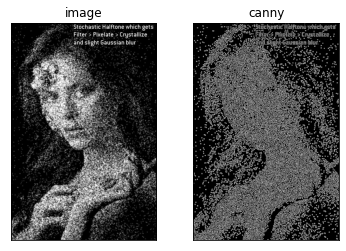

In [6]:
#Canny edge detection algorithm 
#1. noise reduction
#2. gradient calculation
#3. Non-maximum suppression
#4. Double Threshold
#5. Edge Tracking by Hysteries
#img = cv2.imread('C:/Users/theethat.a/Desktop/hgb.jpg')
img = cv2.imread('C:/Users/theethat.a/Desktop/test.jpg',0)
canny = cv2.Canny(img,100,200)#img 1st threshold 2nd threshold 


titles = ['image','canny']
images = [img,canny]


for i in range(len(images)):
    plt.subplot(1,len(images),i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()




In [ ]:
#image pyramid : working with different resolution images 
# gaussin pyramid : repeated subsampling and filtering of an image

lr = cv2.pyrDown(img)



img = cv2.imread('C:/Users/theethat.a/Desktop/test.jpg',0)

lr = cv2.pyrDown(img)


cv2.imshow('original image', img)
cv2.imshow('pyramid Down',lr)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:

apple= cv2.imread('C:/Users/theethat.a/Desktop/testWomenWhite.jpg',0)
orange = cv2.imread('C:/Users/theethat.a/Desktop/testWomenBlack.jpg',0)
width = orange.shape[0]
height = orange.shape[1]
resized_apple = cv2.resize(apple,(418,418))


print(apple.shape)
print(orange.shape)
apple_orange = np.hstack((resized_apple[:, :256], orange[:, 256:]))

# generate Gaussian pyramid for apple
apple_copy = resized_apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)


# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)

# generate Laplacian Pyramid for apple
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
    lp_apple.append(laplacian)

# generate Laplacian Pyramid for orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_orange[i])
    laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
    lp_orange.append(laplacian)

# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n += 1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)
# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6):
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)

cv2.imshow("apple", apple)
cv2.imshow("orange", orange)
cv2.imshow("apple_orange", apple_orange)
cv2.imshow("apple_orange_reconstruct", apple_orange_reconstruct)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1390, 1300)
(418, 418)


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-52oirelq\opencv\modules\core\src\arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [21]:
#contours : same as the mathematic the matrix of the bound of x-y coordinates that specify each coordinate a color intensity 

img = cv2.imread('C:/Users/theethat.a/Desktop/opencvlogo.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = img.resize(480,640)
print('Original Dimensions : ',img.shape)
 
width = 440
height = 440
dim = (width, height)
 
# resize image
resized = cv2.resize(imgray, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)



ret, thresh = cv2.threshold(imgray,127,255,0)
contours, hierachy =cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of countours equal to "+str(len(contours))) 
print(contours[0])
cv2.drawContours(resized,contours,0,(0,255,0),3)

cv2.imshow("image",img )
cv2.imshow("gray",imgray )
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (1478, 1200, 3)
Resized Dimensions :  (440, 440)
Number of countours equal to 1
[[[264 551]]

 [[263 552]]

 [[262 552]]

 ...

 [[267 551]]

 [[266 551]]

 [[265 551]]]


In [3]:
import cv2
# motion detection 
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('C:/Users/theethat.a/Desktop/output.avi')
ret,frame1 = cap.read()
ret,frame2 = cap.read()
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('C:/Users/theethat.a/Desktop/detection.avi',fourcc,20.0, (640,480))

while cap.isOpened():
    diff =cv2.absdiff(frame1,frame2)# find the absolute difference between first and second frame
    gray =cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY) # gray scale is easier to deal with than BGR
    blur = cv2.GaussianBlur(gray,(5,5),0)
    _, thresh = cv2.threshold(blur,20, 255,cv2.THRESH_BINARY) # the _, is apply so that we will not get the first parameter into the variable 
    dilated = cv2.dilate(thresh,None, iterations =3)
    contours,_ = cv2.findContours(dilated,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        (x,y,w,h)= cv2.boundingRect(contour)
        
        if cv2.contourArea(contour)<300:
            continue
        cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frame1,"Status: ()".format('Movement'),(10,20),cv2.FONT_HERSHEY_SIMPLEX,
                   1,(0,0,255),3)
    #cv2.drawContours(frame1, contours, -1, (0,255,0),2)
    cv2.imshow('frame1',frame1)
    out.write(frame1)
    frame1 = frame2
    ret, frame2 =cap.read()
    if cv2.waitKey(40)==27:
        break
cv2.destroyAllWindows()
out.release
cap.release

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-52oirelq\opencv\modules\core\src\arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'
